# The various anomalies in pykep

A number of anomalies are typically of use in space-flight mechanics and its useful to define the various symbols used to indicate them. Throughout pykep code and documentation we mostly use:

$f$: True, $M$: Mean,  $E$: Eccentric, $N$: Hyperbolic Mean, $H$: Hyperbolic, $\zeta$: Gudermannian, $L$: True longitude, $\lambda$: Mean longitude.

To keep the various function name consistent with our naming scheme we do not use there capitalized letters so that ``pykep.n2h``
will be the name indicating a function transforming N to H. At times we also must avoid the use of single letter variables so that for example we may write, for example, **mean** if necessary to indicate $M$.

All anomalies are linked with each other through algebraic explicit and implicit equations such as the most famous Kepler's equation:

$$
M = E - e \sin E
$$

and can be mostly converted to / from using dedicated functions here briefly showcased.

In [3]:
import pykep as pk
import numpy as np
import time
from matplotlib import pyplot as plt

We start considering a satellite on an elliptical orbit having a low eccentricity $e=0.1$. The relation between its True anomaly $f$ and the eccentric anomaly $E$ is relatively simple:

In [4]:
ecc = 0.5
M = 0.2
print("Eccentric Anomaly: ", pk.m2e(M, ecc))

Eccentric Anomaly:  0.39017524962497735


We may have a ``numpy.array`` of True Anomalies (or eccentricities), in which case we can use the vectorized version of the same function (note the subscript):

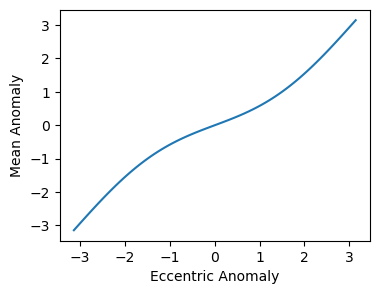

In [5]:
Ms = np.linspace(-np.pi,np.pi, 100)
Es = pk.m2e_v(Ms, ecc)
fig = plt.figure(figsize=(4,3))
plt.plot(Es,Ms)
plt.xlabel("Eccentric Anomaly")
plt.ylabel("Mean Anomaly");

and do the same for, e.g. the True Anomaly relation to $M$

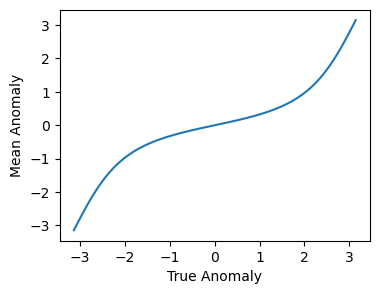

In [6]:
fs = np.linspace(-np.pi,np.pi, 100)
Ms = pk.f2m_v(fs, ecc)
fig = plt.figure(figsize=(4,3))
plt.plot(fs,Ms)
plt.xlabel("True Anomaly")
plt.ylabel("Mean Anomaly");

Finally we may want to know about the comutational speed of these functions. Let us compute 100000 times 100 Eccentric anomalies from the Mean anomaly (i.e. solve 1e7 times Kepler's equation):

In [7]:
start = time.perf_counter()
for i in range(100000):
    Es = pk.m2e_v(Ms, ecc)
end = time.perf_counter()
print(f"We solve {1e7 / (end-start):1.0f} Kepler's Equations each second." )

We solve 3750037 Kepler's Equations each second.
